In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive 
import os
from scipy.stats import norm
from sklearn import linear_model
from sklearn import metrics



import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

In [2]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Statistical_2022 ')

Mounted at /content/drive


# Tarea 2 - Regresion Polinomial & Feature engineering

**Parte 1 - Modelo exponencial de covid-19 usando feature-eng**
crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 30 de mayo. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

In [ ]:
covid19_data = pd.read_csv("/content/drive/MyDrive/Statistical_2022 /covid_19_clean_complete.csv")
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [ ]:
covid19_data['Day of Year'] = covid19_data['Date'].dt.dayofyear
covid19_data['x'] = covid19_data['Day of Year']-covid19_data['Day of Year'].min()

In [ ]:
covid19_data['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
29035   2020-05-10
29036   2020-05-10
29037   2020-05-10
29038   2020-05-10
29039   2020-05-10
Name: Date, Length: 29040, dtype: datetime64[ns]

In [ ]:
covid19_data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Day of Year                int64
x                          int64
dtype: object

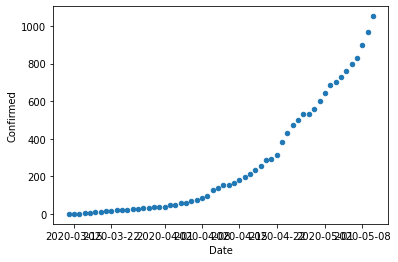

In [ ]:
GT_confirmed = covid19_data[(covid19_data["Country/Region"] == 'Guatemala') & (covid19_data["Confirmed"] > 0)].copy()
GT_confirmed.plot.scatter(x = "Date",y="Confirmed")

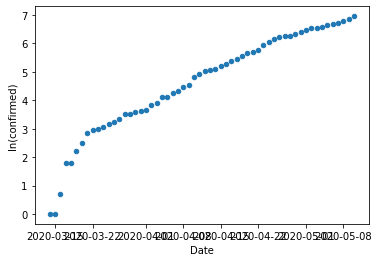

In [ ]:
GT_confirmed["ln(confirmed)"] = np.log(GT_confirmed["Confirmed"])
GT_confirmed.plot.scatter(x = "Date",y="ln(confirmed)")


In [ ]:
GT_confirmed

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Day of Year,x,ln(confirmed)
13851,NaN,Guatemala,15.7835,-90.2308,2020-03-14,1,0,0,74,52,0.000000
14115,NaN,Guatemala,15.7835,-90.2308,2020-03-15,1,0,0,75,53,0.000000
14379,NaN,Guatemala,15.7835,-90.2308,2020-03-16,2,1,0,76,54,0.693147
14643,NaN,Guatemala,15.7835,-90.2308,2020-03-17,6,1,0,77,55,1.791759
14907,NaN,Guatemala,15.7835,-90.2308,2020-03-18,6,1,0,78,56,1.791759
15171,NaN,Guatemala,15.7835,-90.2308,2020-03-19,9,1,0,79,57,2.197225
15435,NaN,Guatemala,15.7835,-90.2308,2020-03-20,12,1,0,80,58,2.484907
15699,NaN,Guatemala,15.7835,-90.2308,2020-03-21,17,1,0,81,59,2.833213
15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,82,60,2.944439
16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,83,61,2.995732


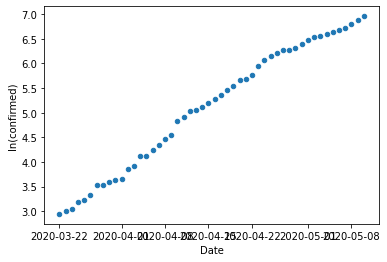

In [ ]:
GT_confirmed_post24 = GT_confirmed[GT_confirmed.Date >= '2020-03-22']
GT_confirmed_post24.plot.scatter(x = "Date",y="ln(confirmed)")

In [ ]:
# Para reproducibilidad de los resultados
np.random.seed(30)
GT_confirmed_post24 = GT_confirmed_post24.sample(frac=1)
# Se define una variable para hacer slicing al 80%
s = int(GT_confirmed_post24.shape[0]*0.8)
x_train = GT_confirmed_post24.iloc[:s,9].values.reshape(-1, 1)
y_train = GT_confirmed_post24.iloc[:s,10].values.reshape(-1, 1)
x_test = GT_confirmed_post24.iloc[s:,9].values.reshape(-1, 1)
y_test = GT_confirmed_post24.iloc[s:,10].values.reshape(-1, 1)

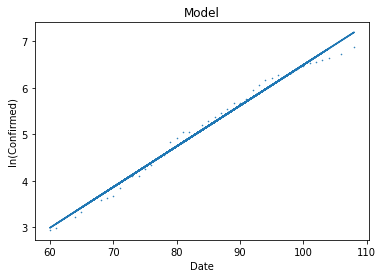

In [ ]:
# Se crea el modelo con los datos de entrenamiento
modelo = linear_model.LinearRegression().fit(x_train, y_train)
# Cálculo de la predicción con reg.predict
y_train_h = modelo.predict(x_train)
y_test_h = modelo.predict(x_test)
# Se utiliza el método mean_absolute_error para obtener un parámetro de
# comparación con el modelo manual
train_error = metrics.mean_absolute_error(y_train, y_train_h)
test_error = metrics.mean_absolute_error(y_test, y_test_h)
# Métodos para obtener parámetros de la regresión sklearn
b0 = modelo.intercept_
b1 = modelo.coef_
# Graficación del modelo y el set de datos en un mismo plano
plt.plot(x_train, y_train_h)
plt.scatter(x_train, y_train, s = 0.3)
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('ln(Confirmed)')
plt.show()

In [ ]:
treinta_mayo=151
prediccion_sin_transformar = modelo.predict(np.array([[treinta_mayo]]))
prediccion_sin_transformar

array([[10.9651286]])

In [ ]:
import math
prediccion_final = math.exp(prediccion_sin_transformar[0][0])
int(prediccion_final)

57822

**Parte 2 - Modelo polinomial de calidad de vinos**

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [8]:
data = pd.read_csv("/content/drive/MyDrive/Statistical_2022 /winequality-red.csv")
data.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Verificando si hay valores nulos

In [9]:
col_50porcientos_null = data.isnull().sum() [data.isnull().sum()>data.shape[0]/2]
col_50porcientos_null

Series([], dtype: int64)

In [10]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
data.shape

(1599, 12)

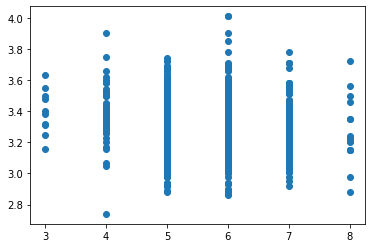

In [ ]:
x = data['quality'].values.reshape(-1, 1) # necesitamos un array de 2D para SkLearn
y = data['pH'].values.reshape(-1, 1)
plt.scatter(x,y)

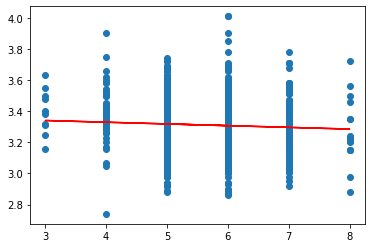

In [ ]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 

In [ ]:
my_plot = data.plot("fixed acidity", "volatile acidity", kind="scatter")
my_plot = data.plot("volatile acidity", "citric acid", kind="scatter")
my_plot = data.plot("citric acid", "fixed acidity", kind="scatter")
my_plot = data.plot("residual sugar", "quality", kind="scatter")
my_plot = data.plot("chlorides", "quality", kind="scatter")
my_plot = data.plot("free sulfur dioxide", "quality", kind="scatter")
my_plot = data.plot("total sulfur dioxide", "quality", kind="scatter")
my_plot = data.plot("density", "quality", kind="scatter")
my_plot = data.plot("pH", "density", kind="scatter")
my_plot = data.plot("sulphates", "quality", kind="scatter")
my_plot = data.plot("alcohol", "quality", kind="scatter")
plt.show()

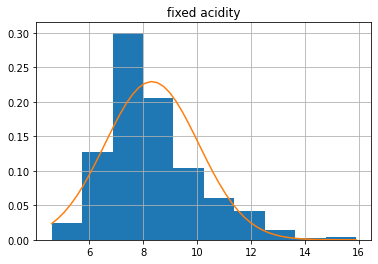

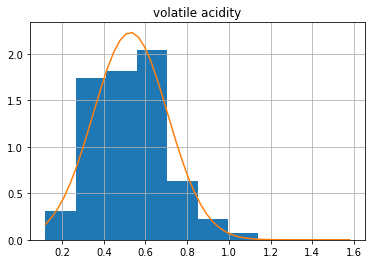

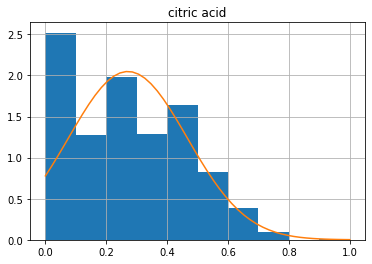

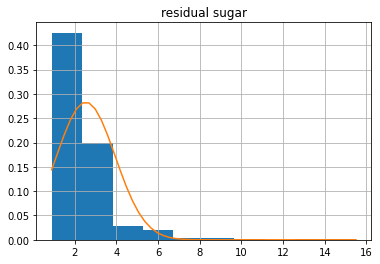

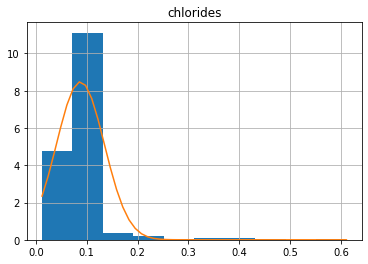

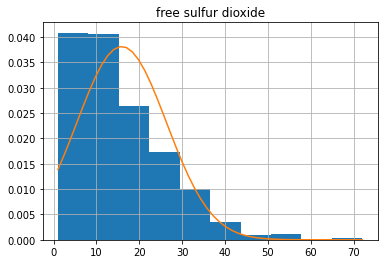

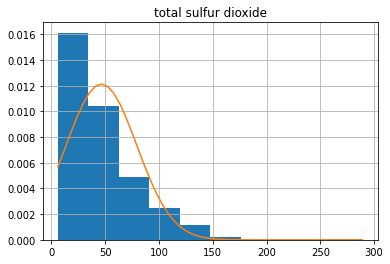

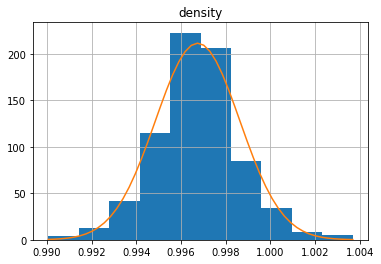

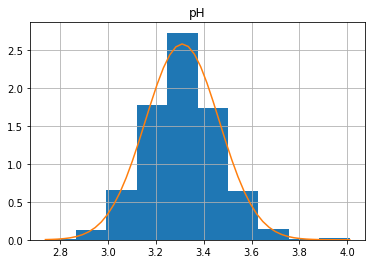

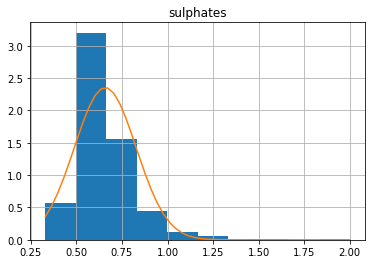

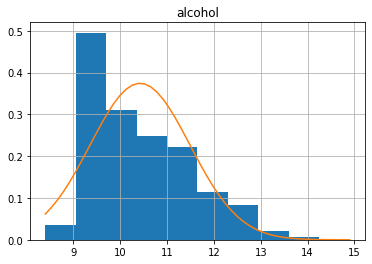

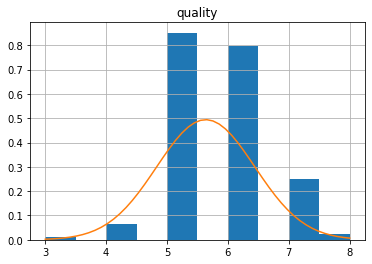

In [ ]:
for col in data.columns:
    data.loc[:, col].hist(density = True)
    norm_fit = norm.fit(data.loc[:, col])
    norm_dist_fitted = norm(*norm_fit)
    plt.title(col)

    data_range = data.loc[:, col].min(),data.loc[:, col].max()
    data_values =  np.linspace(*data_range)
    plt.plot(data_values,norm_dist_fitted.pdf(data_values))
    plt.show()

In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#Analisis Exploratorio sobre Variables de calidad de Vino

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# color
color = sns.color_palette()
print(color)
# Precisión de los datos
pd.set_option('precision', 3)
import matplotlib as mpl
import tensorflow as tf
import datetime



[(0.8862745098039215, 0.2901960784313726, 0.2), (0.20392156862745098, 0.5411764705882353, 0.7411764705882353), (0.596078431372549, 0.5568627450980392, 0.8352941176470589), (0.4666666666666667, 0.4666666666666667, 0.4666666666666667), (0.984313725490196, 0.7568627450980392, 0.3686274509803922), (0.5568627450980392, 0.7294117647058823, 0.25882352941176473), (1.0, 0.7098039215686275, 0.7215686274509804)]


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Statistical_2022 /winequality-red.csv")
df.head()

#data=pd.read_csv('winequality-red.csv',sep = ';')
#data.head()
# Significado del campo
#"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
# "Acidez fija"; "acidez volátil"; "ácido cítrico"; "azúcar residual"; cloruro ";" dióxido de azufre libre ";" dióxido de azufre total ";" densidad ";" pH ";" sulfato "; alcohol" ; "Calidad"


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [5]:
# Obtén todos los estilos integrados
print(plt.style.available)

# Utilice el embellecimiento de estilo propio de plt
plt.style.use('ggplot')


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [6]:
# Obtener cada campo
# Método 1
colnm = df.columns.to_list()
print(colnm)
print(len(colnm))
# Método 2
print()
print(list(df))


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
12

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


# Figura 1: de caja

Diagrama de caja


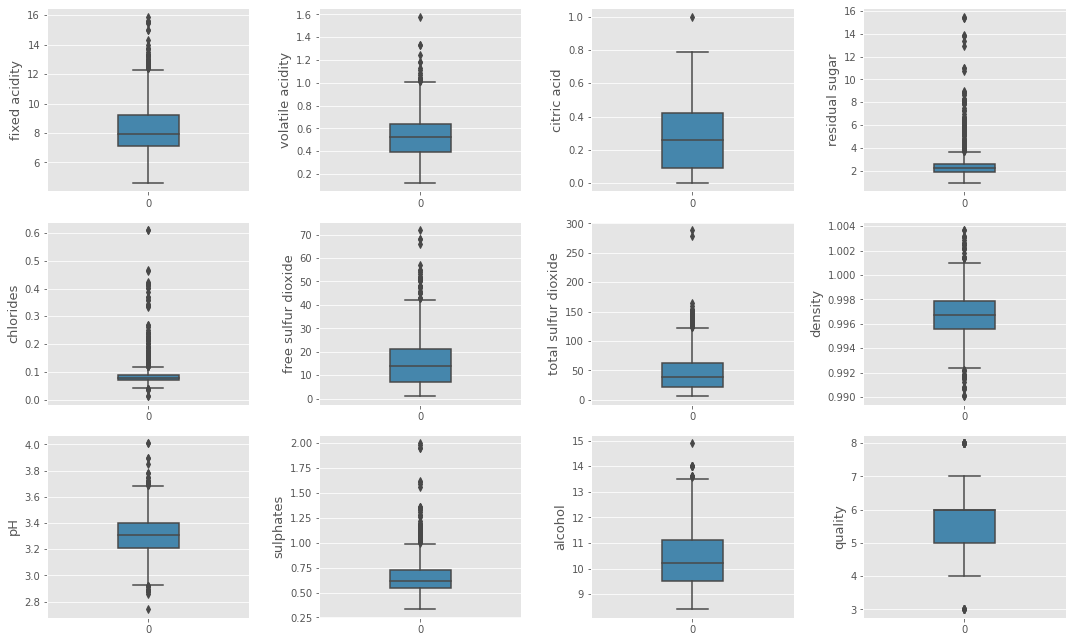

In [12]:
fig = plt.figure(figsize=(15,9))
j = 0
for i in df.columns:
    plt.subplot(3,4,j+1)  # Tres filas y cuatro columnas, el subgrafo cuya posición es i + 1
    j+=1
    # orient: "v" | "h" se usa para controlar si la imagen se muestra horizontal o verticalmente (esto generalmente se infiere del tipo d de la variable de entrada. Este parámetro es generalmente cuando no se pasan xey, sino solo los datos se pasan en uso)
    sns.boxplot(data = df[i], width = 0.3, color = color[1])
    plt.ylabel(i,fontsize = 13)
    # plt.xlabel('one_pic')
# Ajuste gráfico
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.9, hspace=0.1)  # El lado izquierdo del subgrafo El intervalo de ancho entre subgrafos La altura del subgrafo Intervalo de altura entre subgrafos
# tight_layout ajustará automáticamente los parámetros de la subimagen para llenar toda el área de la imagen
plt.tight_layout()
print('Diagrama de caja')


# Figura 2: Dibujando histograma

IndexError: ignored

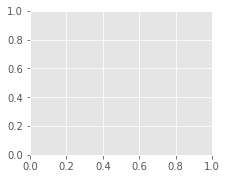

In [13]:
fig = plt.figure(figsize=(15, 9))
for i in range(12):
    plt.subplot(3,4,i+1)  # 3 filas y 4 columnas, el subgrafo cuya posición es i + 1
    df[colnm[i]].hist(bins=80, color=color[8])  # bins Especifique cuántas barras mostrar
    plt.xlabel(colnm[i], fontsize=13)
    plt.ylabel('Frequency')
# tight_layout ajustará automáticamente los parámetros de la subimagen para llenar toda el área de la imagen
plt.tight_layout()
# plt.savefig('hist.png')
print('Histograma')


Según los diagramas de caja e histogramas, este conjunto de datos estudia principalmente la relación entre la calidad del vino y las propiedades físicas y químicas.
El rango de evaluación de este conjunto de datos es 3-8, de los cuales el 82% de la calidad es 5 y 6. (siendo 1 el Peor vino y 10 el Mejor)

“fixed acidity”;“volatile acidity”;“citric acid”;“free sulfur dioxide” ;total sulfur dioxide; “sulphates”; PH

Hay un total de siete en este conjunto de datos que están relacionados con la acidez; las primeras seis características están todas relacionadas con el ph de la acidez y el pH está en una escala logarítmica. A continuación, tome el logaritmo de las primeras seis características y haga un histograma. Además, el pH está relacionado principalmente con la acidez fija, que es de 1 a 2 órdenes de magnitud más alta que la acidez volátil y el ácido cítrico (Figura 4), y 3 órdenes de magnitud más alta que el dióxido de azufre libre, el dióxido de azufre total y los sulfatos. Una nueva característica del ácido total proviene de la suma de las tres primeras características.

#Figure 3: Acidity Features in log10 Scale


Figure 3: Acidity Features in log10 Scale


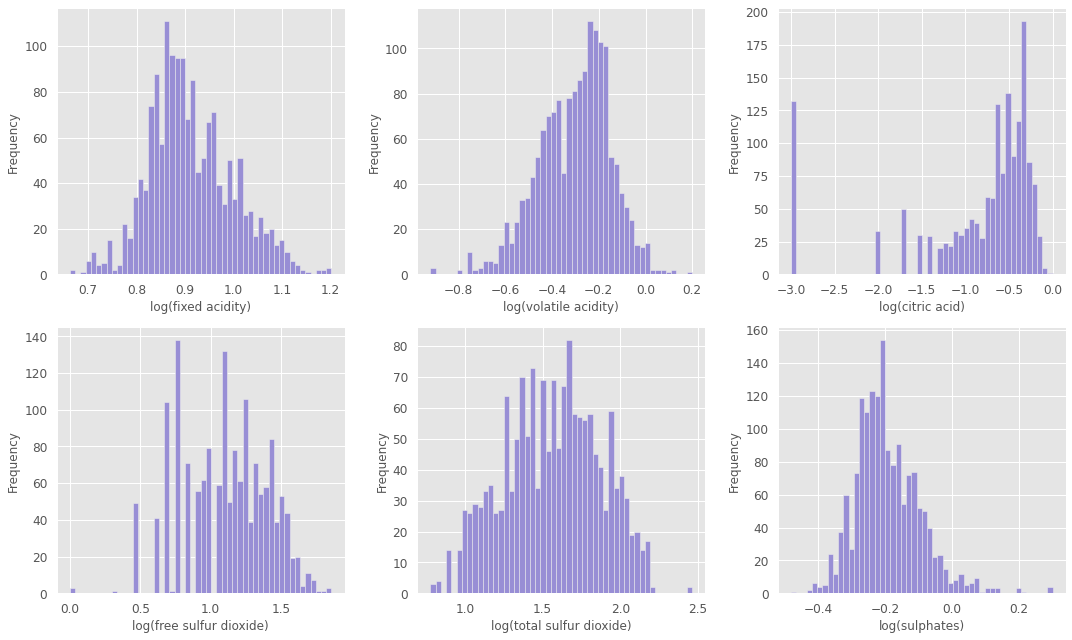

In [ ]:
acidityFeat = ['fixed acidity', 'volatile acidity', 'citric acid',
               'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']
fig = plt.figure(figsize=(15, 9))
for i in range(6):
    plt.subplot(2,3,i+1)
    v = np.log10(np.clip(df[acidityFeat[i]].values, a_min = 0.001, a_max = None))  # clip Esta función limita los elementos de la matriz a a_min y a_max. Si es mayor que a_max, será igual a a_max, y si es menor que a_min, será igual a a_min.
    plt.hist(v, bins = 50, color = color[2])
    plt.xlabel('log(' + acidityFeat[i] + ')',fontsize = 12)

    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 3: Acidity Features in log10 Scale')
        


#Figure 4:
##Histogram of Acid Concentration 

Figure 4


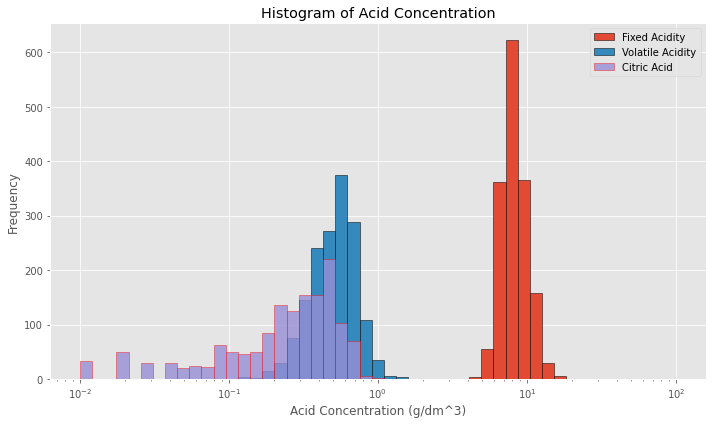

In [ ]:
plt.figure(figsize=(10,6))
# print(np.linspace(-2, 2))
bins = 10**(np.linspace(-2, 2))  # Parada predeterminada de muestreo de intervalo = Verdadero se puede llevar hasta el final
# bins= 20
plt.hist(df['fixed acidity'], bins = bins, edgecolor = 'k', label = 'Fixed Acidity')  #edgecolor Color del borde del histograma
plt.hist(df['volatile acidity'], bins = bins, edgecolor = 'black', label = 'Volatile Acidity')
plt.hist(df['citric acid'], bins = bins, edgecolor = 'red', alpha = 0.8, label = 'Citric Acid')
plt.xscale('log')  # Establezca el eje x del gráfico actual en coordenadas logarítmicas.
plt.xlabel('Acid Concentration (g/dm^3)')
plt.ylabel('Frequency')
plt.title('Histogram of Acid Concentration')
plt.legend()
plt.tight_layout()
print('Figure 4')


#Figure 5: Total Acid Histogram

In [ ]:
# Acidez total
df['total acid'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']
# print(data)


Figure 5: Total Acid Histogram


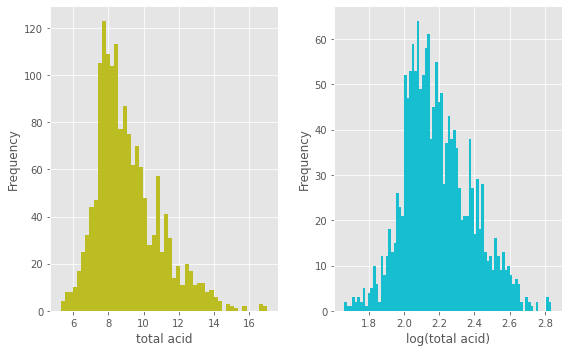

In [ ]:
plt.figure(figsize = (8,5))

plt.subplot(121)  # # La disposición de las imágenes en la primera imagen es de 1 fila y 2 columnas. La primera imagen
plt.hist(df['total acid'], bins = 50, color = color[8])
plt.xlabel('total acid')
plt.ylabel('Frequency')

plt.subplot(122)
plt.hist(np.log(df['total acid']), bins = 80 , color = color[9])
plt.xlabel('log(total acid)')
plt.ylabel('Frequency')

plt.tight_layout()
print("Figure 5: Total Acid Histogram")

# Si no se establece plt.subplot, será una imagen
# plt.hist(df['total acid'], bins = 50, color = color[4])
# plt.xlabel('total acid')
# plt.ylabel('Frequency')
# plt.hist(np.log(df['total acid']), bins = 80 , color = color[5])
# plt.xlabel('log(total acid)')
# plt.ylabel('Frequency')



#Análisis Bivariado
##Relación entre la Calidad del Vino y las features 

Figure 7: Physicochemical Properties and Wine Quality by Boxplot



Figure 7: Physicochemical Properties and Wine Quality by Boxplot


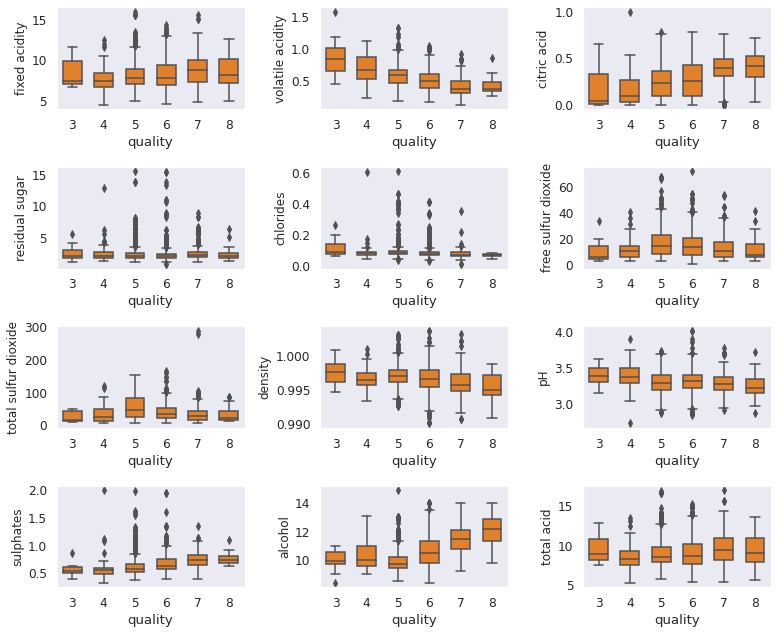

In [ ]:
# set_style Hay cinco temas preestablecidos en el mar: cuadrícula oscura (cuadrícula oscura), cuadrícula blanca (cuadrícula blanca), todo negro (oscuro), todo blanco (blanco), escala completa (ticks).
# Control de estilo set_style (), set_context () establecerá los parámetros predeterminados de matplotlib.
sns.set_style('dark')
sns.set_context("notebook", font_scale= 1.1)

# s = df.columns.tolist()
# print(s)
# colnm = df.columns.tolist()[:11] + ['total acid']
# print(colnm)

# Obtener la columna especificada
colnm = df.columns.to_list()[:11] + ['total acid']
# print(df)
# print(colnm)
# final_df = df[colnm]
# print(final_df)

plt.figure(figsize = (11, 9))

for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(x ='quality', y = colnm[i], data = df, color = color[1], width = 0.6)    
    plt.ylabel(colnm[i],fontsize = 12)
plt.tight_layout()
print("\nFigure 7: Physicochemical Properties and Wine Quality by Boxplot")


##Figure 8: Pairwise Correlation Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Figure 8: Pairwise Correlation Plot


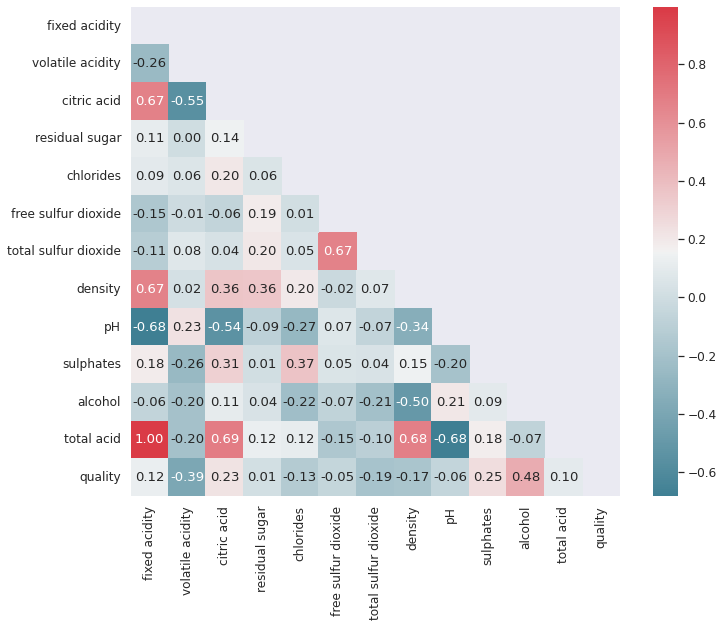

In [ ]:
sns.set_style()

plt.figure(figsize = (12,9))
colnm = df.columns.to_list()[:11] + ['total acid', 'quality']
# No cumple con datos continuos, distribución normal, relación lineal, el uso del coeficiente de correlación de Spearman es el más apropiado, cuando también se usan dos datos de medición secuenciados entre el coeficiente de correlación de Spearman
# pearson: el coeficiente de correlación de Pearson mide si dos conjuntos de datos están en una línea, es decir, el cálculo del coeficiente de correlación para datos lineales, habrá errores para datos no lineales.
# kendall: un indicador que se utiliza para reflejar la correlación de variables categóricas, es decir, el coeficiente de correlación para series desordenadas y datos de distribución no normal
# spearman: coeficiente de correlación de datos de análisis no lineal, no ortogonal
# mcorr = df[colnm].corr(method='spearman')

# Si no es un número, obtenga_dummies one_hot y calcule el coeficiente de correlación después de codificar

mcorr = df[colnm].corr()
# print(mcorr)

#La función # zeros_like es principalmente para realizar la construcción de una matriz W_update, cuya dimensión es consistente con la matriz W, e inicializarla a todo 0; esta función construye convenientemente una nueva matriz sin la necesidad de un parámetro para especificar el tamaño de la forma.
# mask = np.zeros_like(mcorr, dtype=None)   #  0 0 0 0

mask = np.zeros_like(mcorr, dtype=np.bool)
# print(mask)

mask[np.triu_indices_from(mask)] = True   # 1
# print(mask)
# Paleta Establece el estilo del color general y la proporción del gráfico, incluidas las paletas de colores, etc. Llame al estilo del sistema para la visualización de datos
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Mapa de calor
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("\nFigure 8: Pairwise Correlation Plot")  


#CREACIÓN DEL MODELO

In [ ]:

from tensorflow random seed

SyntaxError: ignored

In [ ]:
# Para reproducibilidad de los resultados
np.random.seed(101)
tf.set_random_seed(101)
df = df.sample(frac=1)
# Se define una variable para hacer slicing al 80%
s = int(df.shape[0]*0.8)
best_variables = ['volatile acidity','citric acid']
indices = [df.columns.get_loc(i) for i in best_variables]
x_train = df.iloc[:s,indices].values.reshape(-1, len(best_variables))
y_train = df.iloc[:s,11].values.reshape(-1, 1)
x_test = df.iloc[s:,indices].values.reshape(-1, len(best_variables))
y_test = df.iloc[s:,11].values.reshape(-1, 1)

AttributeError: ignored

In [ ]:
x_train

array([[0.71, 0.  ],
       [0.84, 0.03],
       [0.57, 0.14],
       ...,
       [0.38, 0.46],
       [1.02, 0.43],
       [0.68, 0.02]])

In [ ]:
y_train

array([[5],
       [7],
       [5],
       ...,
       [7],
       [6],
       [4]])

In [ ]:

x_train.shape[0]

1279

In [ ]:
poly=PolynomialFeatures(degree=len(best_variables), include_bias=True)
x_train_poly_features = poly.fit_transform(x_train)
x_test_poly_features = poly.fit_transform(x_test)

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

learning_rate = 0.01
training_epochs = 200

# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)
  
# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * x_train.shape[0])
  
# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
  
# Global Variables Initializer
init = tf.global_variables_initializer()

# Starting the Tensorflow Session
with tf.Session() as sess:
      
    # Initializing the Variables
    sess.run(init)
      
    # Iterating through all the epochs
    for epoch in range(training_epochs):
          
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x_train_poly_features, y_train):
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})
          
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x_train_poly_features, Y : y_train})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
      
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x_train_poly_features, Y: y_train})
    weight = sess.run(W)
    bias = sess.run(b)


    # Calculating the predictions
#predictions = weight * x + bias
#print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

# Plotting the Results
#plt.plot(x, y, 'ro', label ='Original data')
#plt.plot(x, predictions, label ='Fitted line')
#plt.title('Linear Regression Result')
#plt.legend()
#plt.show()


# Se crea el modelo con los datos de entrenamiento
#modelo = linear_model.LinearRegression().fit(x_train_poly_features, y_train)
# Cálculo de la predicción con reg.predict

#y_train_h = modelo.predict(x_train_poly_features)
#y_test_h = modelo.predict(x_test_poly_features)
# Se utiliza el método mean_absolute_error para obtener un parámetro de
# comparación con el modelo manual
#train_error = metrics.mean_absolute_error(y_train, y_train_h)
#test_error = metrics.mean_absolute_error(y_test, y_test_h)
# Métodos para obtener parámetros de la regresión sklearn
#b0 = modelo.intercept_
#b1 = modelo.coef_


AttributeError: ignored

In [ ]:
print(x_train[80:100])
print(y_train[80:100])
print(y_train_h[80:100])

[[0.27 0.53]
 [0.36 0.46]
 [0.41 0.63]
 [0.53 0.04]
 [0.6  0.22]
 [0.56 0.2 ]
 [0.66 0.03]
 [0.4  0.48]
 [0.58 0.13]
 [0.26 0.37]
 [0.58 0.25]
 [0.48 0.07]
 [0.66 0.15]
 [0.44 0.5 ]
 [0.37 0.53]
 [0.39 0.24]
 [0.69 0.08]
 [0.31 0.4 ]
 [0.6  0.03]
 [0.62 0.04]]
[[7]
 [7]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [5]
 [7]
 [5]
 [5]
 [6]
 [4]
 [6]
 [7]
 [5]
 [5]]
[[6.14012878]
 [5.90473212]
 [5.93583176]
 [5.65573166]
 [5.42809231]
 [5.50411586]
 [5.44728092]
 [5.83428003]
 [5.5030525 ]
 [6.0807057 ]
 [5.45481091]
 [5.72048908]
 [5.35823724]
 [5.76667371]
 [5.92813911]
 [5.80920437]
 [5.35694839]
 [5.98308052]
 [5.54505527]
 [5.50288558]]


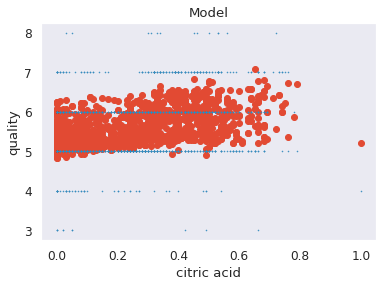

In [ ]:
x = df.iloc[:s,indices[1]].values.reshape(-1, 1)

# Graficación del modelo y el set de datos en un mismo plano
plt.scatter(x, y_train_h)
plt.scatter(x, y_train, s = 0.3)
plt.title('Model')
plt.xlabel(best_variables[1])
plt.ylabel('quality')
plt.show()

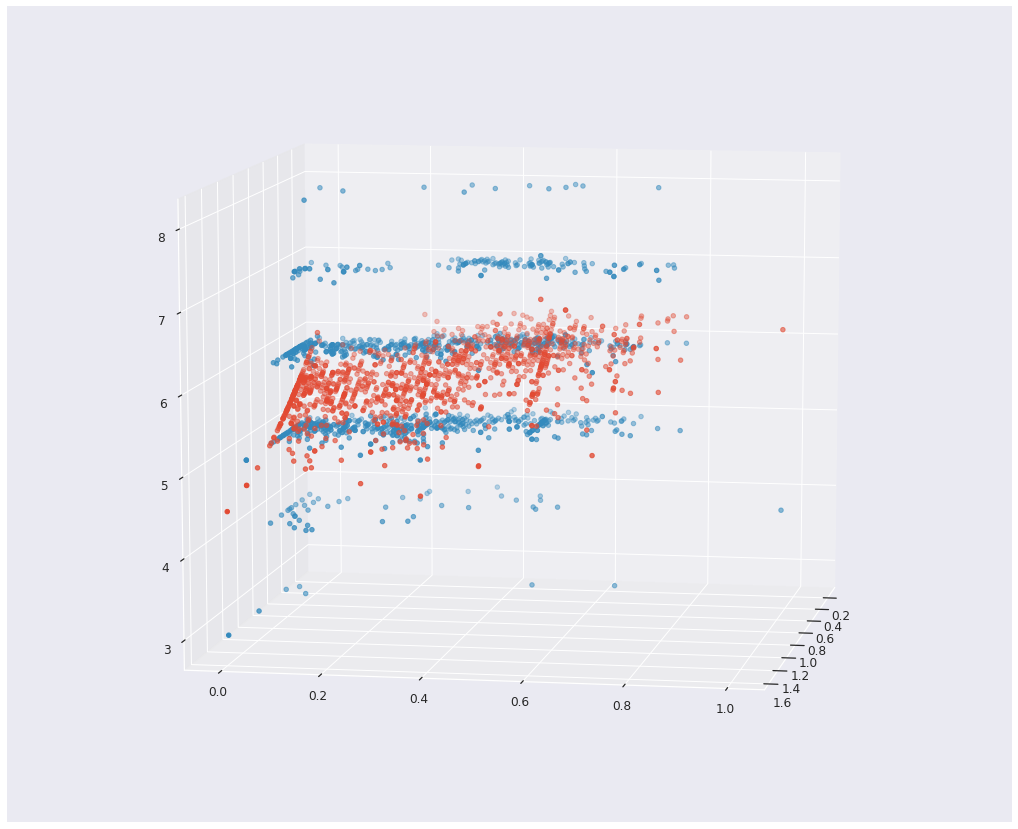

In [ ]:
%matplotlib inline
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(projection='3d')


ax.scatter3D(df.iloc[:s,indices[0]].values.reshape(-1,), df.iloc[:s,indices[1]].values.reshape(-1, ), y_train_h.reshape(-1, ))
ax.scatter3D(df.iloc[:s,indices[0]].values.reshape(-1,), df.iloc[:s,indices[1]].values.reshape(-1, ), y_train.reshape(-1, ), cmap='viridis')
ax.view_init(10,10)

In [ ]:
import tensorflow as tf
import datetime

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs